In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   
from __future__ import division


import matplotlib.gridspec as gridspec 
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn

#nlp
import string
import re    #for regexfrom sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

chat = pd.read_json('../data/chat_data.json')
chat.head()

,DOW,Day,Hour,Month,Quarter,Year,editedAt,id,issue number,mentions,question_marks,readBy,sent,text,url,username,v
0,3,25,7,1,1,2018,NaN,5a698b69ce68c3bc74ff3b39,NaN,apb7,0,39,1516866409126,Thanks @apb7,None,yashLadha,1
1,3,25,14,1,1,2018,1.516892e+12,5a69f04a6117191e61afa2fa,4607.0,seanlip,0,40,1516892234418,@seanlip I need some help with getting a revie...,None,bansalnitish,2
10,2,31,10,1,1,2018,NaN,5a7198134a6b0dd32b6e10f2,NaN,None,0,41,1517393939783,[![image.png](https://files.gitter.im/oppia/op...,https://files.gitter.im/oppia/oppia-chat/bqyp/...,anookeen,1
100,6,14,15,1,1,2018,NaN,5a5b770ab48e8c3566dba6cd,NaN,YimingPan,1,27,1515943690956,@YimingPan yes I have the same problem. So di...,None,Kunalgarg2100,1
1000,3,12,15,10,4,2017,NaN,59df84ccbac826f05466fbbe,NaN,shubha1593,1,16,1507820747999,@shubha1593 I was taking a look at the constan...,None,Nix07,1


In [2]:
chat.drop(["editedAt","sent"], axis=1, inplace=True)
chat = chat[chat.columns[::-1]]

In [3]:
text = chat['text'].copy()

In [4]:
import nltk
nltk.download('stopwords')
# function to clean data
stops = set(stopwords.words("english"))
def cleanData(text, lowercase = False, remove_stops = False, stemming = False):
    txt = text
    txt = re.sub(r'[^A-Za-z0-9\s]',r'',txt)
    txt = re.sub(r'\n',r' ',txt)
    
    if lowercase:
        txt = " ".join([w.lower() for w in txt.split()])
        
    if remove_stops:
        txt = " ".join([w for w in txt.split() if w not in stops])
    
    if stemming:
        st = PorterStemmer()
        txt = " ".join([st.stem(w) for w in txt.split()])

    return txt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shazmohammad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
chat['text'] = chat['text'].apply(cleanData, lowercase = True, remove_stops = True, stemming = True)

In [6]:
tfidfvec = TfidfVectorizer(analyzer='word', ngram_range = (1,4), min_df=10)
tfidfdata = tfidfvec.fit_transform(chat['text'])

In [7]:
feature_names = tfidfvec.get_feature_names()
len(feature_names)

1866

In [8]:
# create dataframe for features
tfidf_df = pd.DataFrame(tfidfdata.todense())

# set column names
tfidf_df.columns = feature_names

In [11]:
X=tfidf_df

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X=tfidf_df)
cluster = pd.DataFrame(chat[['text','mentions','username','question_marks']])
cluster['cluster'] = kmeans.predict(tfidf_df)

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

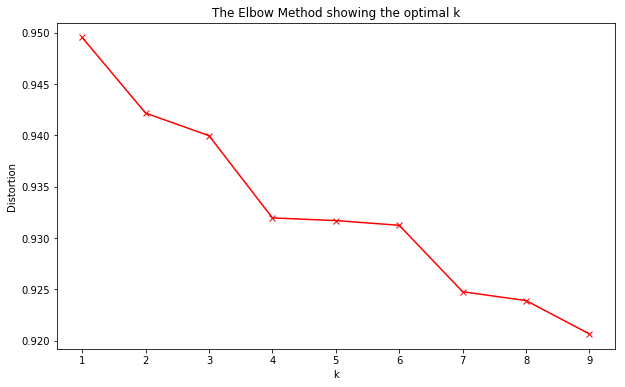

In [19]:
# Plot the elbow
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-', color='r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [107]:
def GetILOC(number):
    print "Cluster =",cluster[ cluster['question_marks'] > 0 ][['cluster','actual_comment']].iloc[number]['cluster']
    print cluster[ cluster['question_marks'] > 0 ][['cluster','actual_comment']].iloc[number]['actual_comment']

In [108]:
cluster['cluster'].value_counts()

0    13341
1      577
2      559
Name: cluster, dtype: int64

In [24]:
X = np.array(X)

For n_clusters = 2 The average silhouette_score is : 0.025227967119298485


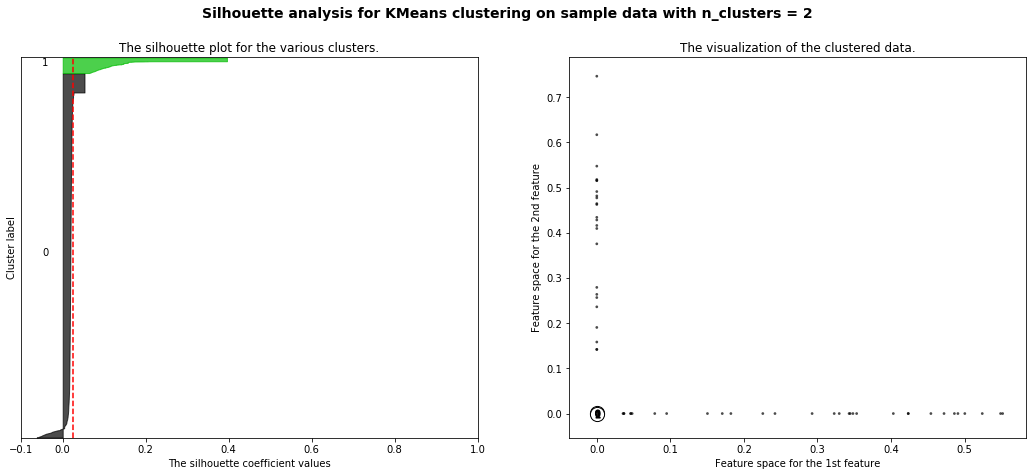

For n_clusters = 3 The average silhouette_score is : 0.027917665347414956


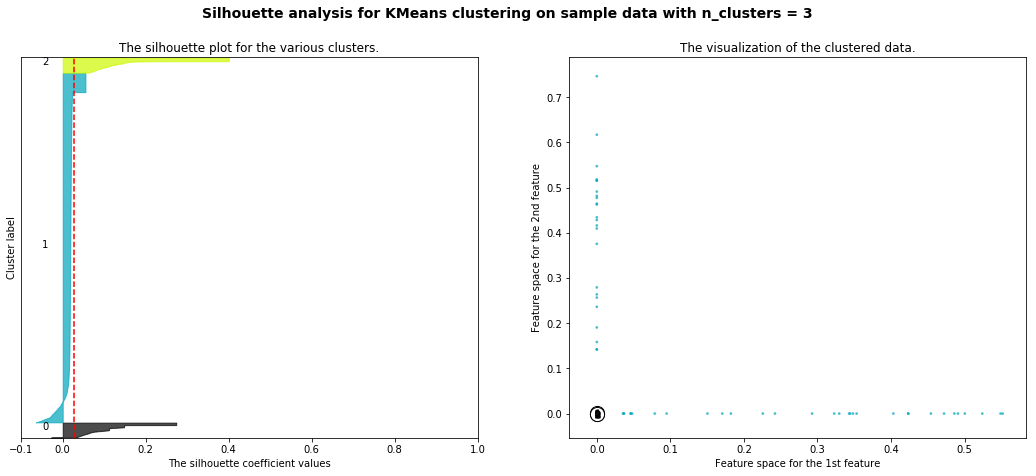

For n_clusters = 4 The average silhouette_score is : 0.03139139090386377


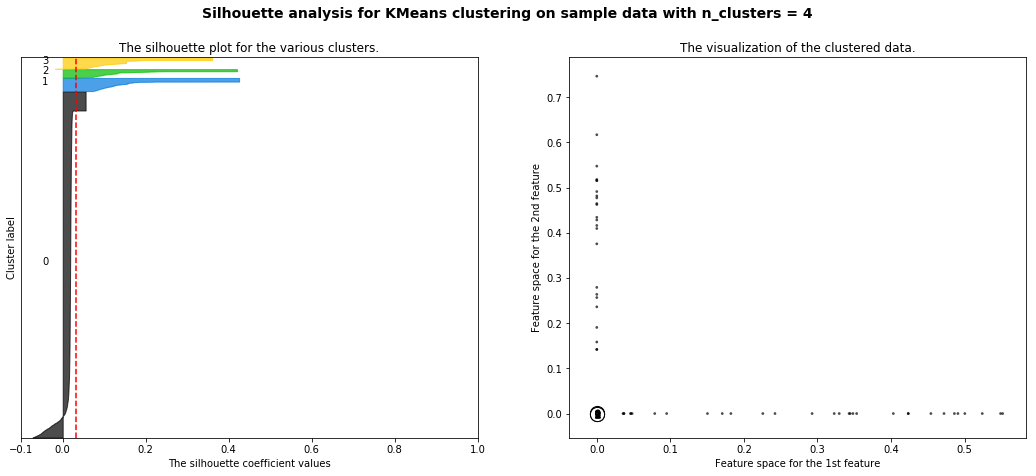

For n_clusters = 5 The average silhouette_score is : 0.027805699367632462


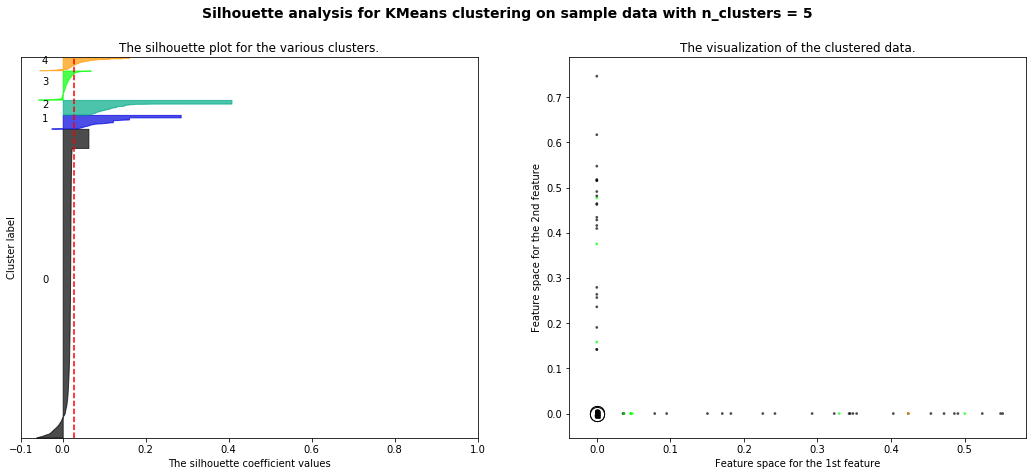

For n_clusters = 6 The average silhouette_score is : 0.028566867978458747


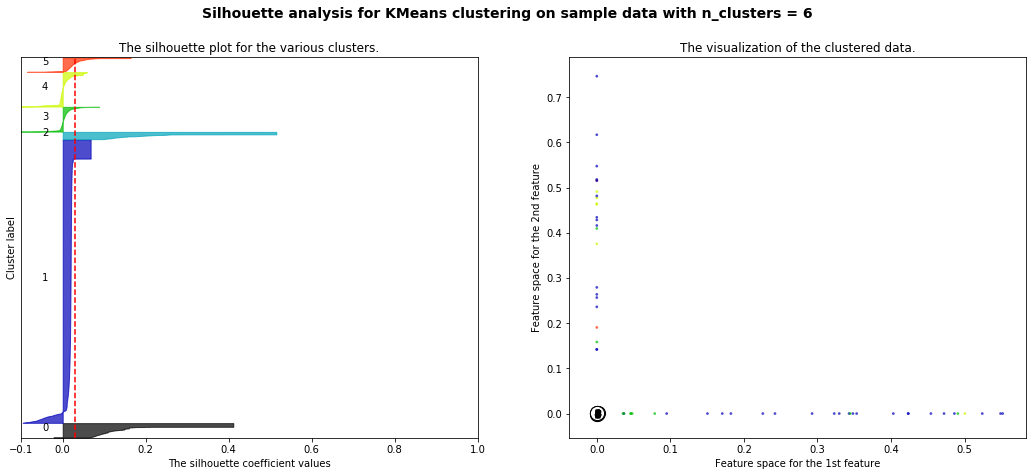

In [25]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

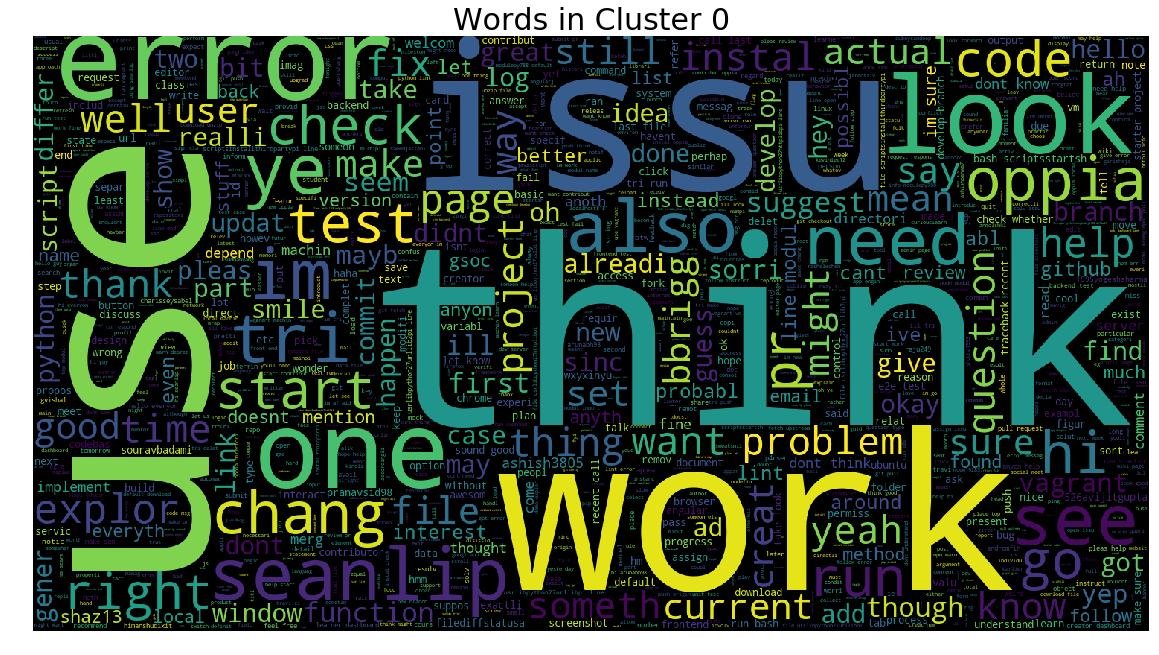

In [109]:
stopword=set(STOPWORDS)
text=cluster[cluster['cluster'] == 0].text.values
wc= WordCloud(background_color="black", max_words=2000, stopwords=stopword, height=800, width=1500)
wc.generate(" ".join(text))
plt.figure(figsize=(20,12))
plt.axis("off")
plt.title("Words in Cluster 0" , fontsize=30)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=1)
plt.show()

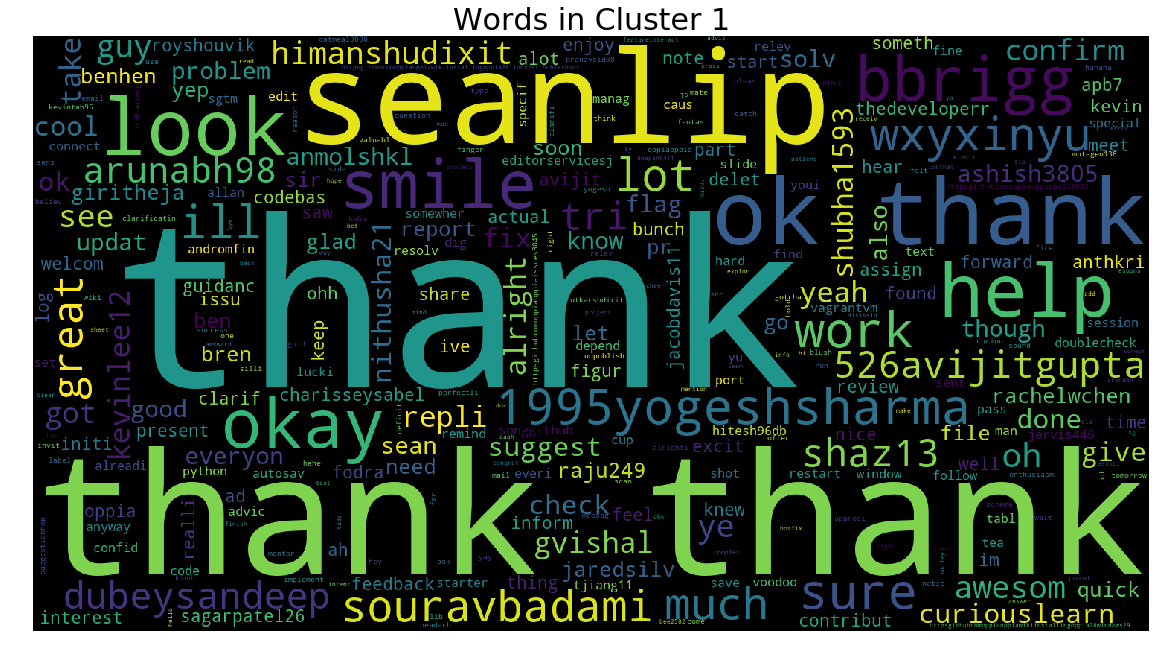

In [110]:
stopword=set(STOPWORDS)
text=cluster[cluster['cluster'] == 1].text.values
wc= WordCloud(background_color="black", max_words=2000, stopwords=stopword, height=800, width=1500)
wc.generate(" ".join(text))
plt.figure(figsize=(20,12))
plt.axis("off")
plt.title("Words in Cluster 1" , fontsize=30)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=1)
plt.show()

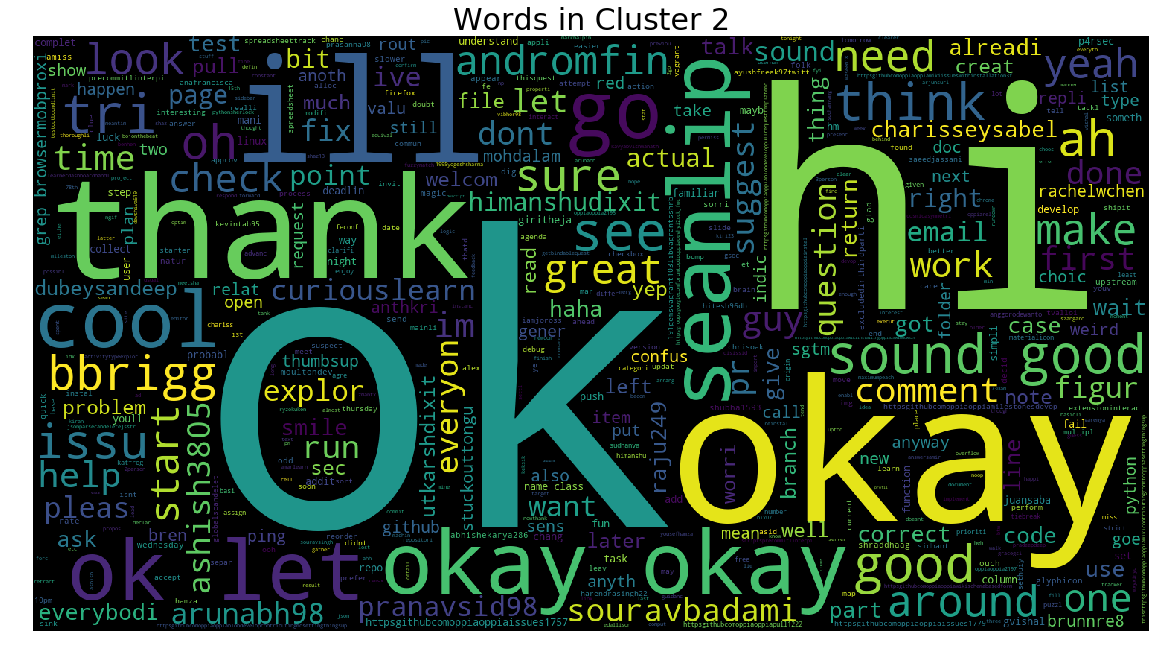

In [111]:
stopword=set(STOPWORDS)
text=cluster[cluster['cluster'] == 2].text.values
wc= WordCloud(background_color="black", max_words=2000, stopwords=stopword, height=800, width=1500)
wc.generate(" ".join(text))
plt.figure(figsize=(20,12))
plt.axis("off")
plt.title("Words in Cluster 2" , fontsize=30)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=1)
plt.show()